# Data Exploration - Loan Prediction

## Imports

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Data Analysis

In [97]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [98]:
train_original=train.copy()
test.original=test.copy()

In [99]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [100]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [101]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [102]:
train.shape


(614, 13)

In [103]:
test.shape

(367, 12)

In [104]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Analysis of target variable

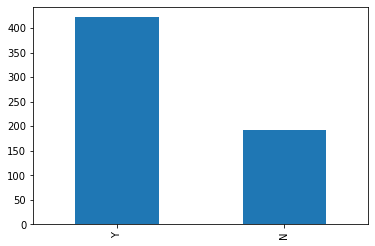

In [105]:
train['Loan_Status'].value_counts().plot.bar()

### Analysis of binary variables

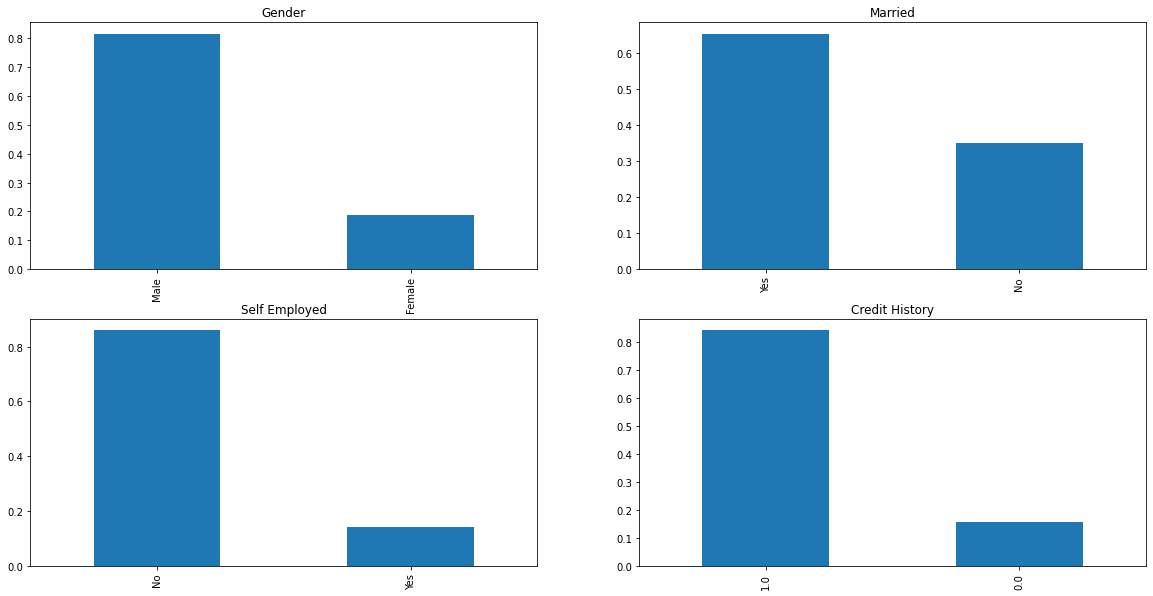

In [106]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Self Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Credit History')
plt.show()

### Analysis of categorical variables

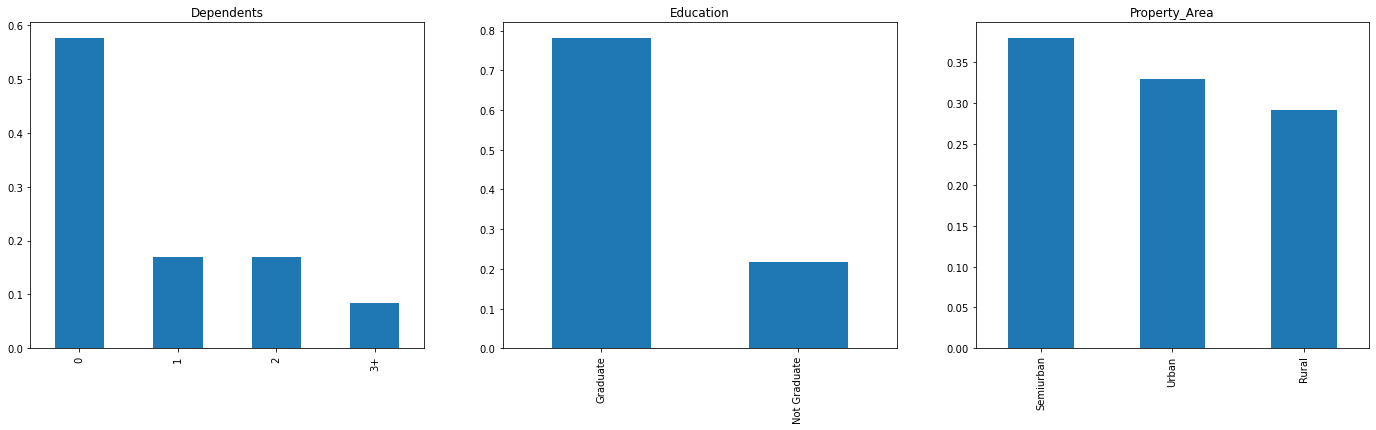

In [107]:
plt.figure(1) 
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Property_Area')
plt.show()

### Analysis of continuous variables

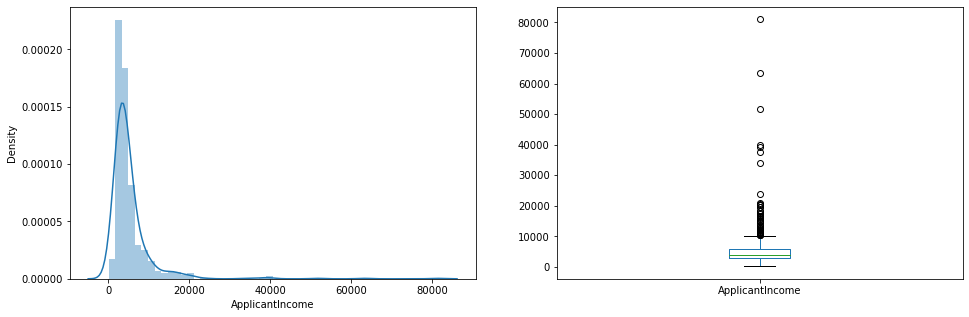

In [108]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

#### Hypotheses: Applicants with a higher education earn more money

Text(0.5, 0.98, '')

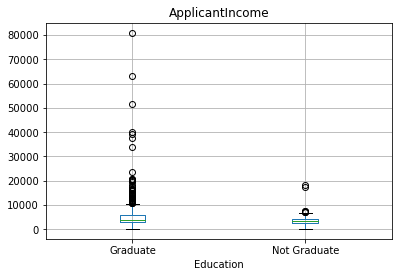

In [109]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

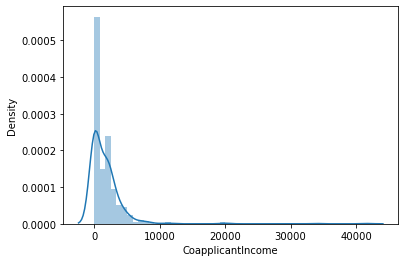

In [110]:
sns.distplot(train['CoapplicantIncome']);

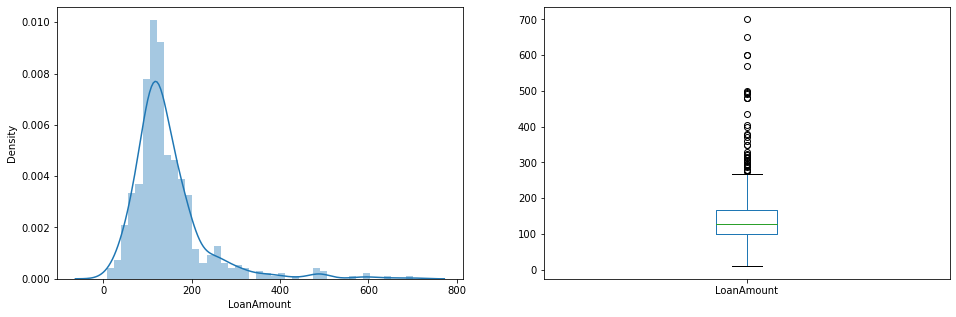

In [111]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

### Analysis of  categorical variables and target variable

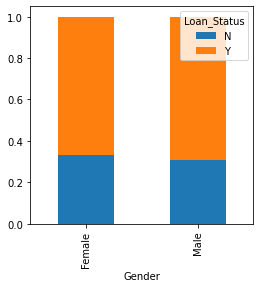

In [112]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

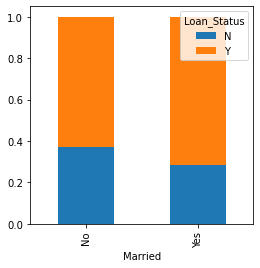

In [113]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

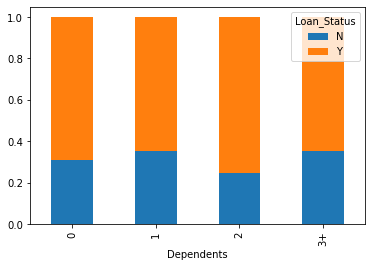

In [114]:
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True)
plt.show()

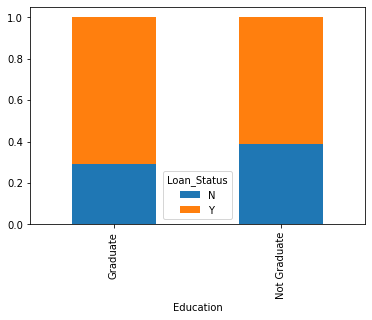

In [115]:
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True)
plt.show()

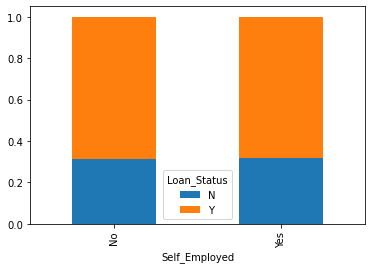

In [116]:
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True)
plt.show()

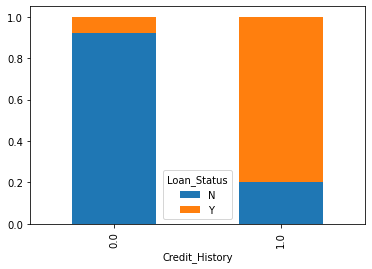

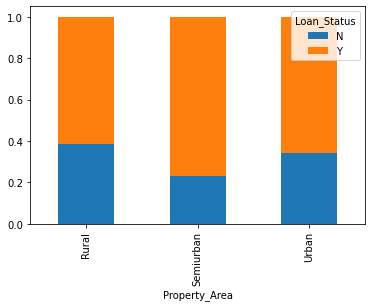

In [117]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True)
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True)

### Analysis of continuous variables and target variable

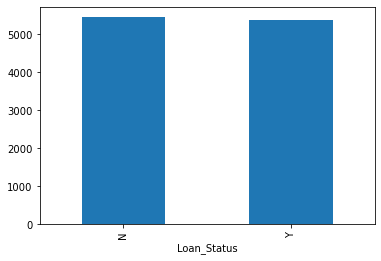

In [118]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0, 0.5, 'Percentage')

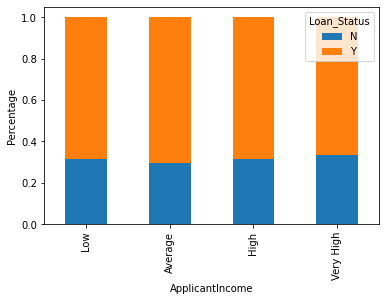

In [119]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome') 
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

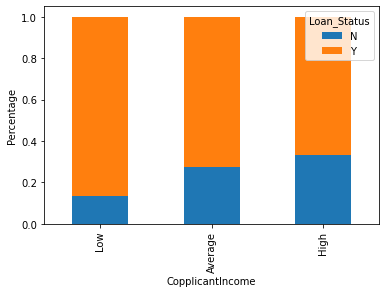

In [120]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CopplicantIncome') 
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

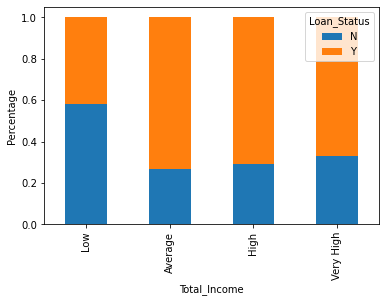

In [121]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

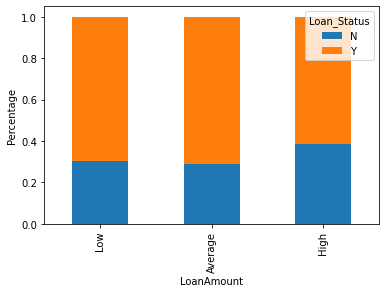

In [122]:
bins=[0,100,200,700] 
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount') 
plt.ylabel('Percentage')

### Correlation Matrix

In [123]:
train=train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'], axis=1)
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

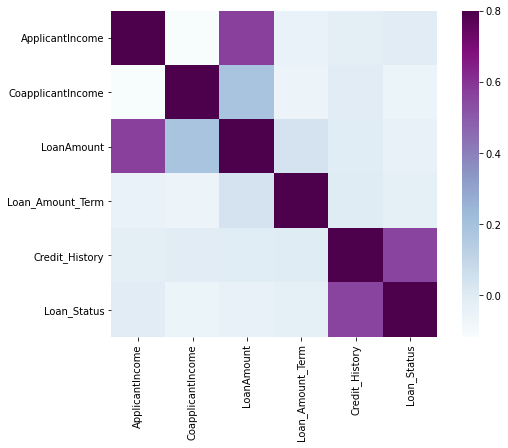

In [124]:
matrix = train.corr() 
f, ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

## Data Preparation
### Missing Values

In [125]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [126]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [127]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [128]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [129]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [130]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [131]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Outlier Treatment with log transformation

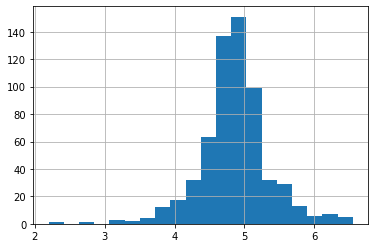

In [132]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

## Model building with Logistic Regression

In [133]:
train=train.drop('Loan_ID', axis=1)
test=test.drop('Loan_ID', axis=1)

In [134]:
X=train.drop('Loan_Status',1)
y=train.Loan_Status

In [135]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [136]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0,
                   class_weight=None, 
                   dual=False, 
                   fit_intercept=True, 
                   intercept_scaling=1, 
                   max_iter=100, 
                   multi_class='ovr',
                   n_jobs=1,
                   penalty='12',
                   random_state=1,
                   solver='liblinear',
                   tol=0.0001, 
                   verbose=0,
                   warm_start=False)
pred_cv=model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7621621621621621

In [138]:
pred_test = model.predict(test)

### Logistic Regression with 5-fold crossvalidation

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
i=1
kfold=StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index, test_index in kfold.split(X,y):
    print('\n{} of kfold {}'.format(i,kfold.n_splits))
    xtrain,xvalidation = X.iloc[train_index],X.iloc[test_index]
    ytrain,yvalidation = y.iloc[train_index],y.iloc[test_index]
    model=LogisticRegression(random_state = 1)
    model.fit(xtrain, ytrain)
    prediction_test= model.predict(xvalidation)
    score=accuracy_score(yvalidation,prediction_test)
    print ('accuracy_score', score)
    i+=1 
    prediction_test = model.predict(test)
    pred=model.predict_proba(xvalidation)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


## Evaluation with ROC and AUC

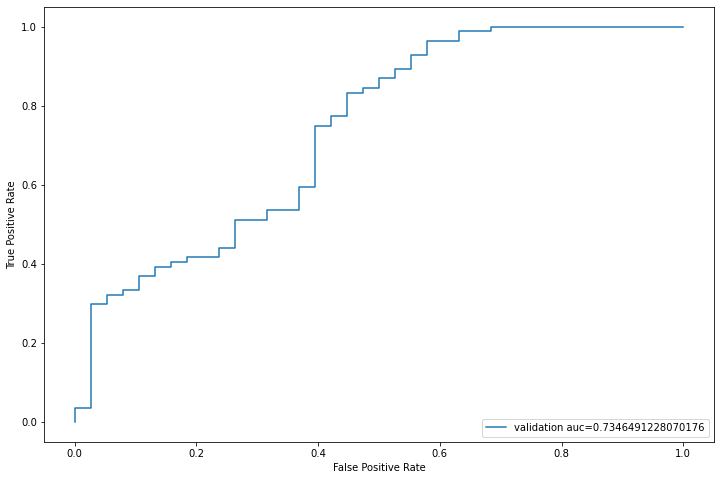

In [140]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvalidation, pred)
auc= metrics.roc_auc_score(yvalidation, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()